In [1]:
import numpy as np
import pandas as pd

In [93]:
df = pd.read_csv('teacher.csv')

In [94]:
df.keys()

Index(['Year', 'Prof.', 'AssProf.', 'AsstProf.', 'Lecture', 'Prof.Outside',
       'AssProf.Outside', 'AsstProf.Outside', 'LectureOutside'],
      dtype='object')

In [122]:
df.head()

,Year,Prof.,AssProf.,AsstProf.,Lecture,Prof.Outside,AssProf.Outside,AsstProf.Outside,LectureOutside
0,1950.0,178.0,71.0,NaN,64.0,NaN,NaN,NaN,NaN
1,1951.0,186.0,74.0,NaN,76.0,NaN,NaN,NaN,NaN
2,1952.0,187.0,77.0,NaN,89.0,NaN,NaN,NaN,NaN
3,1953.0,204.0,81.0,NaN,104.0,NaN,NaN,NaN,NaN
4,1954.0,224.0,93.0,NaN,121.0,NaN,NaN,NaN,NaN


In [96]:
# 將沒有年份(不連續)的資料清除
del_col = df[df['Year'].notnull()]
del_col.index = range(len(del_col))
df1 = del_col

In [97]:
df1.corr()

,Year,Prof.,AssProf.,AsstProf.,Lecture,Prof.Outside,AssProf.Outside,AsstProf.Outside,LectureOutside
Year,1.000000,0.985789,0.846220,0.956099,-0.315704,0.937066,0.968068,0.656017,0.877551
Prof.,0.985789,1.000000,0.846407,0.700342,-0.395765,0.878274,0.925910,0.574049,0.870955
AssProf.,0.846220,0.846407,1.000000,-0.751297,0.058124,0.584471,0.648577,0.442146,0.652177
AsstProf.,0.956099,0.700342,-0.751297,1.000000,-0.972021,0.858788,0.867795,0.833204,0.721861
Lecture,-0.315704,-0.395765,0.058124,-0.972021,1.000000,-0.714022,-0.705319,-0.460660,-0.832782
Prof.Outside,0.937066,0.878274,0.584471,0.858788,-0.714022,1.000000,0.973481,0.839205,0.951972
AssProf.Outside,0.968068,0.925910,0.648577,0.867795,-0.705319,0.973481,1.000000,0.707270,0.937468
AsstProf.Outside,0.656017,0.574049,0.442146,0.833204,-0.460660,0.839205,0.707270,1.000000,0.872944
LectureOutside,0.877551,0.870955,0.652177,0.721861,-0.832782,0.951972,0.937468,0.872944,1.000000


  - Prof. & Lecture corr < 0 , if Prof. ↑  then Lecture ↓ , is right?

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Text(0,0.5,'Lecture')

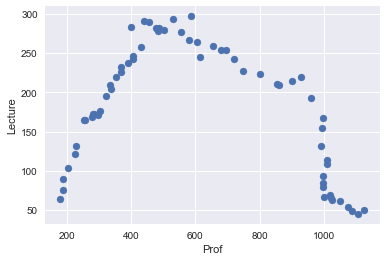

In [112]:
x = df1['Prof.']
y = df1['Lecture']
plt.scatter(x, y)
plt.xlabel('Prof')
plt.ylabel('Lecture')

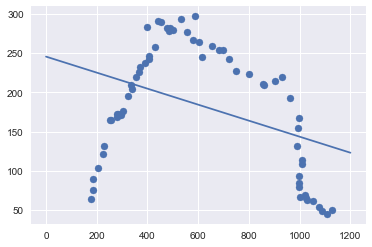

In [113]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 1200, 10000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

 - Cruical year about 1970
 - From Prof. & Lecture plot , we can see perform " ∩ " type
 
 - #### I want to know lecture is or not saturation
 
 
 - Now we can assume :
 
  - Θo = 50(lecture is saturation)
  - H0 : Θ >= 50
  - H1 : Θ <  50

In [12]:
import scipy.stats as stats

In [13]:
df1.keys()

Index(['Year', 'Prof.', 'AssProf.', 'AsstProf.', 'Lecture', 'Prof.Outside',
       'AssProf.Outside', 'AsstProf.Outside', 'LectureOutside'],
      dtype='object')

In [ ]:
x_num = df1['Prof.'].isnull().sum()
y_num = df1['AssProf.'].isnull().sum()
z_num = df1['AsstProf.'].isnull().sum()
a_num = df1['Lecture'].isnull().sum()
b_num = df1['Prof.Outside'].isnull().sum()
c_num = df1['AssProf.Outside'].isnull().sum()
d_num = df1['AsstProf.Outside'].isnull().sum()
e_num = df1['LectureOutside'].isnull().sum()

In [ ]:
# Perform the ANOVA
x = df1['Prof.'][x_num:]
y = df1['AssProf.'][y_num:]
z = df1['AsstProf.'][z_num:]
a = df1['Lecture'][a_num:]
b = df1['Prof.Outside'][b_num:]
c = df1['AssProf.Outside'][c_num:]
d = df1['AsstProf.Outside'][d_num:]
e = df1['LectureOutside'][e_num:]
stats.f_oneway(x,y,z,a,b,c,d,e)

In [127]:
# Perform the ANOVA
x = df1['Prof.'][x_num:]
a = df1['Lecture'][a_num:]
stats.f_oneway(x,a) # F - value

F_onewayResult(statistic=121.7468946525648, pvalue=3.180903112872633e-20)

In [129]:
stats.ttest_ind(x, a, equal_var = False) # T - test & 雙尾 P - value

Ttest_indResult(statistic=11.033897527735373, pvalue=4.4175501654013745e-17)

 - Now we can get t-test(t) = 11.033 
 - When confidence Interval 90 % (n = 60 ; t-value(t0) = 1.2958)
 - Because t > t0 , so we can reject H0
 - #### And now we can predict lecture is not saturation